## Advanced Regression Assignment

#### Problem Statement:

A US based company is looking at prospective properties to buy  at Australia to enter their market. They need a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Essentially, the company wants —
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

**So interpretation is important!**

In [694]:
# import all libraries required for building the model

#import NumPy and Pandas and read the dataset provided by Australia housing companies
import numpy as np
import pandas as pd
import scipy.stats as stats

#importing matplotlib and seaborn for data visualisation
import seaborn as sb
import matplotlib.pyplot as plt

#sklearn library to build the model and scale the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from scipy.stats import norm

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1. Reading the data

In [695]:
housing_data=pd.read_csv('train.csv')
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [696]:
housing_data.shape

(1460, 81)

In [697]:
housing_data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [698]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [699]:
# Checking for Null values and its impact
housing_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [700]:
housing_data.columns[housing_data.isna().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

## Getting the missing values in ascending order count and finding the percentage of missing values

In [701]:
housing_data.isna().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [702]:
#Checking the number of missing values and its percentage
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values.head(80)

Total_missing_values  Percent_missing_values
PoolQC                       1453               99.520548
MiscFeature                  1406               96.301370
Alley                        1369               93.767123
Fence                        1179               80.753425
MasVnrType                    872               59.726027
...                           ...                     ...
ExterCond                       0                0.000000
ExterQual                       0                0.000000
Exterior2nd                     0                0.000000
Exterior1st                     0                0.000000
RoofMatl                        0                0.000000

[80 rows x 2 columns]

## Below columns have more than 90% of missing values hence dropping them:
- PoolQC
- MiscFeature
- Alley



#### Removing Id columns as it has no role in prediction

In [703]:
# Dropping columns with more tha 90%  of missing values

housing_data.drop(['Id','PoolQC','MiscFeature','Alley'],axis=1,inplace = True)

In [704]:
housing_data.shape

(1460, 77)

In [705]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [706]:
#Checking the no of unique values in each column
housing_data.nunique()

MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 77, dtype: int64

#### DATA IMPUTATION FOR CATEGORICAL COLUMNS

In [707]:
# Data imputation for column 'GarageQual'

housing_data.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [708]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
housing_data['GarageQual'] = housing_data['GarageQual'].replace(np.nan,'TA')

In [709]:
housing_data['GarageQual'].dtype

dtype('O')

In [710]:
# Data imputation for column 'GarageFinish'

housing_data.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

As all the values are almost evenly distributed it would be not right to replace null with mode.So creating a new category names unknown

In [711]:
housing_data['GarageFinish']=housing_data['GarageFinish'].replace(np.nan,'Unknown')

In [712]:
housing_data.GarageFinish.value_counts()

GarageFinish
Unf        605
RFn        422
Fin        352
Unknown     81
Name: count, dtype: int64

In [713]:
# Data imputation for column 'GarageType'

housing_data.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [714]:
# Most of the values are ATTCHD , so we can map the NAN values of 'GarageType' to ATTCHD (MODE)
housing_data['GarageType'] = housing_data['GarageType'].replace(np.nan,'Attchd')

In [715]:
housing_data.GarageType.value_counts()


GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [716]:
# Data imputation for column 'GarageCond'
housing_data.GarageCond.value_counts()   

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [717]:
# Most of the values is TA , so we can map the NAN values of 'GarageCond' to TA -MODE
housing_data['GarageCond'] = housing_data['GarageCond'].replace(np.nan,'TA')

In [718]:
housing_data.GarageCond.value_counts()   

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

### DATA IMPUTATION FOR NUMERICAL COLUMNS

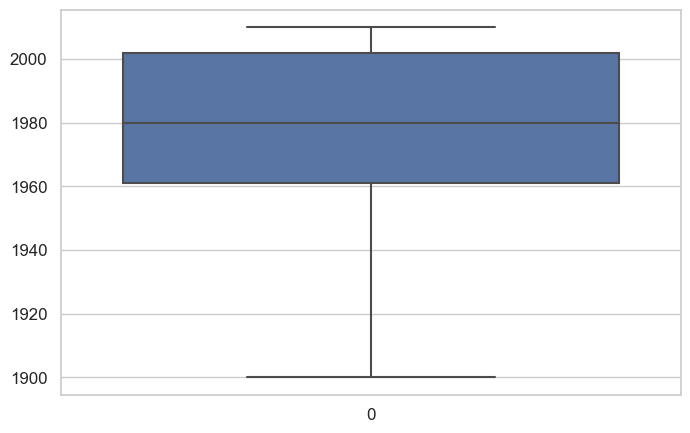

In [719]:
#PLots for outlier analysis of GarageYrBlt
sb.boxplot(housing_data.GarageYrBlt)
plt.show()

There are no outiers so imputing missing values with mean

In [720]:
housing_data['GarageYrBlt'].fillna(housing_data['GarageYrBlt'].mean(),inplace=True)

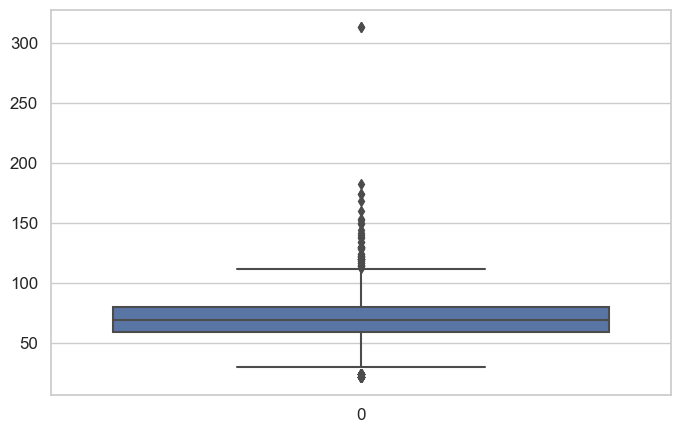

In [721]:
#PLots for outlier analysis for LotFrontage
sb.boxplot(housing_data.LotFrontage)
plt.show()

As there are outliers imputing with median

In [722]:
housing_data['LotFrontage'].fillna(housing_data['LotFrontage'].median(),inplace=True)

In [723]:
# As the other columns have less than 3% of Nan Values we chose to drop those rows .

housing_data.dropna(inplace=True)

In [724]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
MSSubClass                       0                     0.0
BedroomAbvGr                     0                     0.0
GarageType                       0                     0.0
FireplaceQu                      0                     0.0
Fireplaces                       0                     0.0
...                            ...                     ...
ExterQual                        0                     0.0
MasVnrArea                       0                     0.0
MasVnrType                       0                     0.0
Exterior2nd                      0                     0.0
SalePrice                        0                     0.0

[77 rows x 2 columns]

## Visualising the datahousing_data

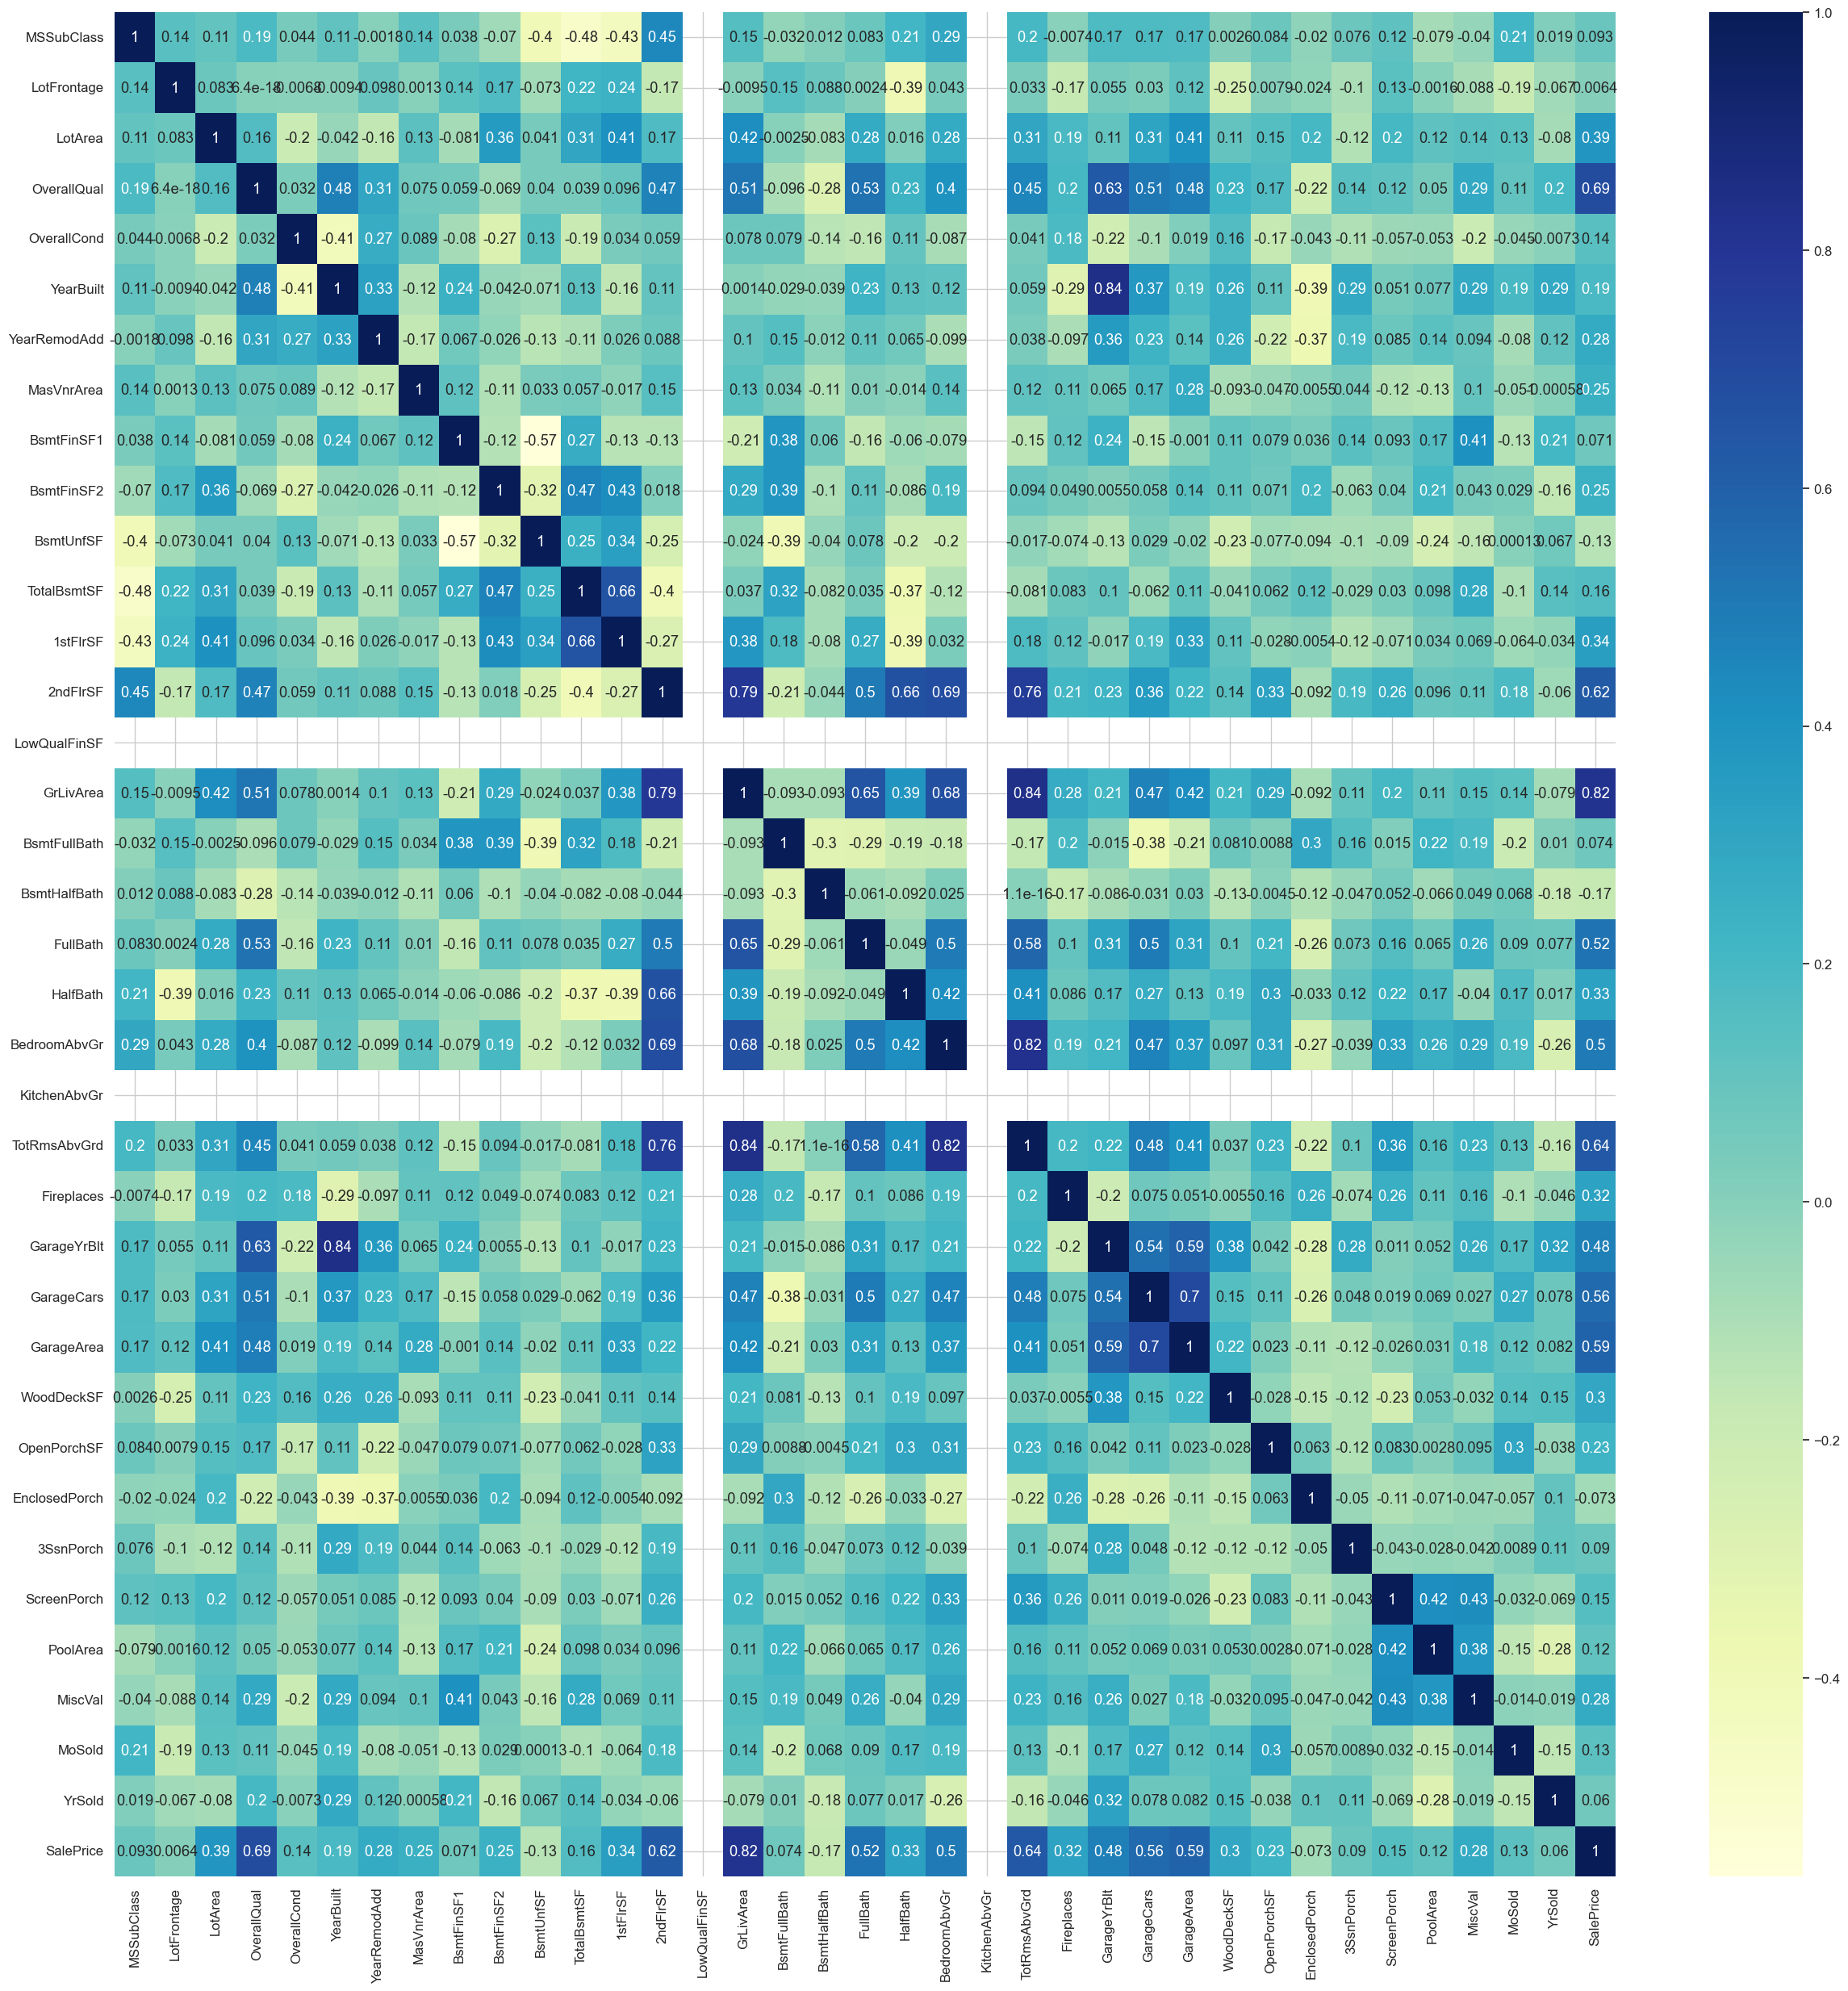

In [725]:
## Plotting heatmap
#Correlation map to see how features are correlated with SalePrice
plt.figure(figsize=(30,30))
sb.heatmap(housing_data.corr(numeric_only=True),annot=True,cmap="YlGnBu")
plt.show()

## Inference:
- Garage Cars and Garage Arre are highly corelated
- OverallQual has the highest correlation with SalesPrice
- Below Features van play important roles in determining the SalePrice as per the correlation matrix:
   1. OverallQual
   2. GrLivArea
   3. GarageCars
   4. GarageArea
   5. TotalBsmtSF
   6. 1stFlrSF
   7. FullBath
   8. YearBuilt

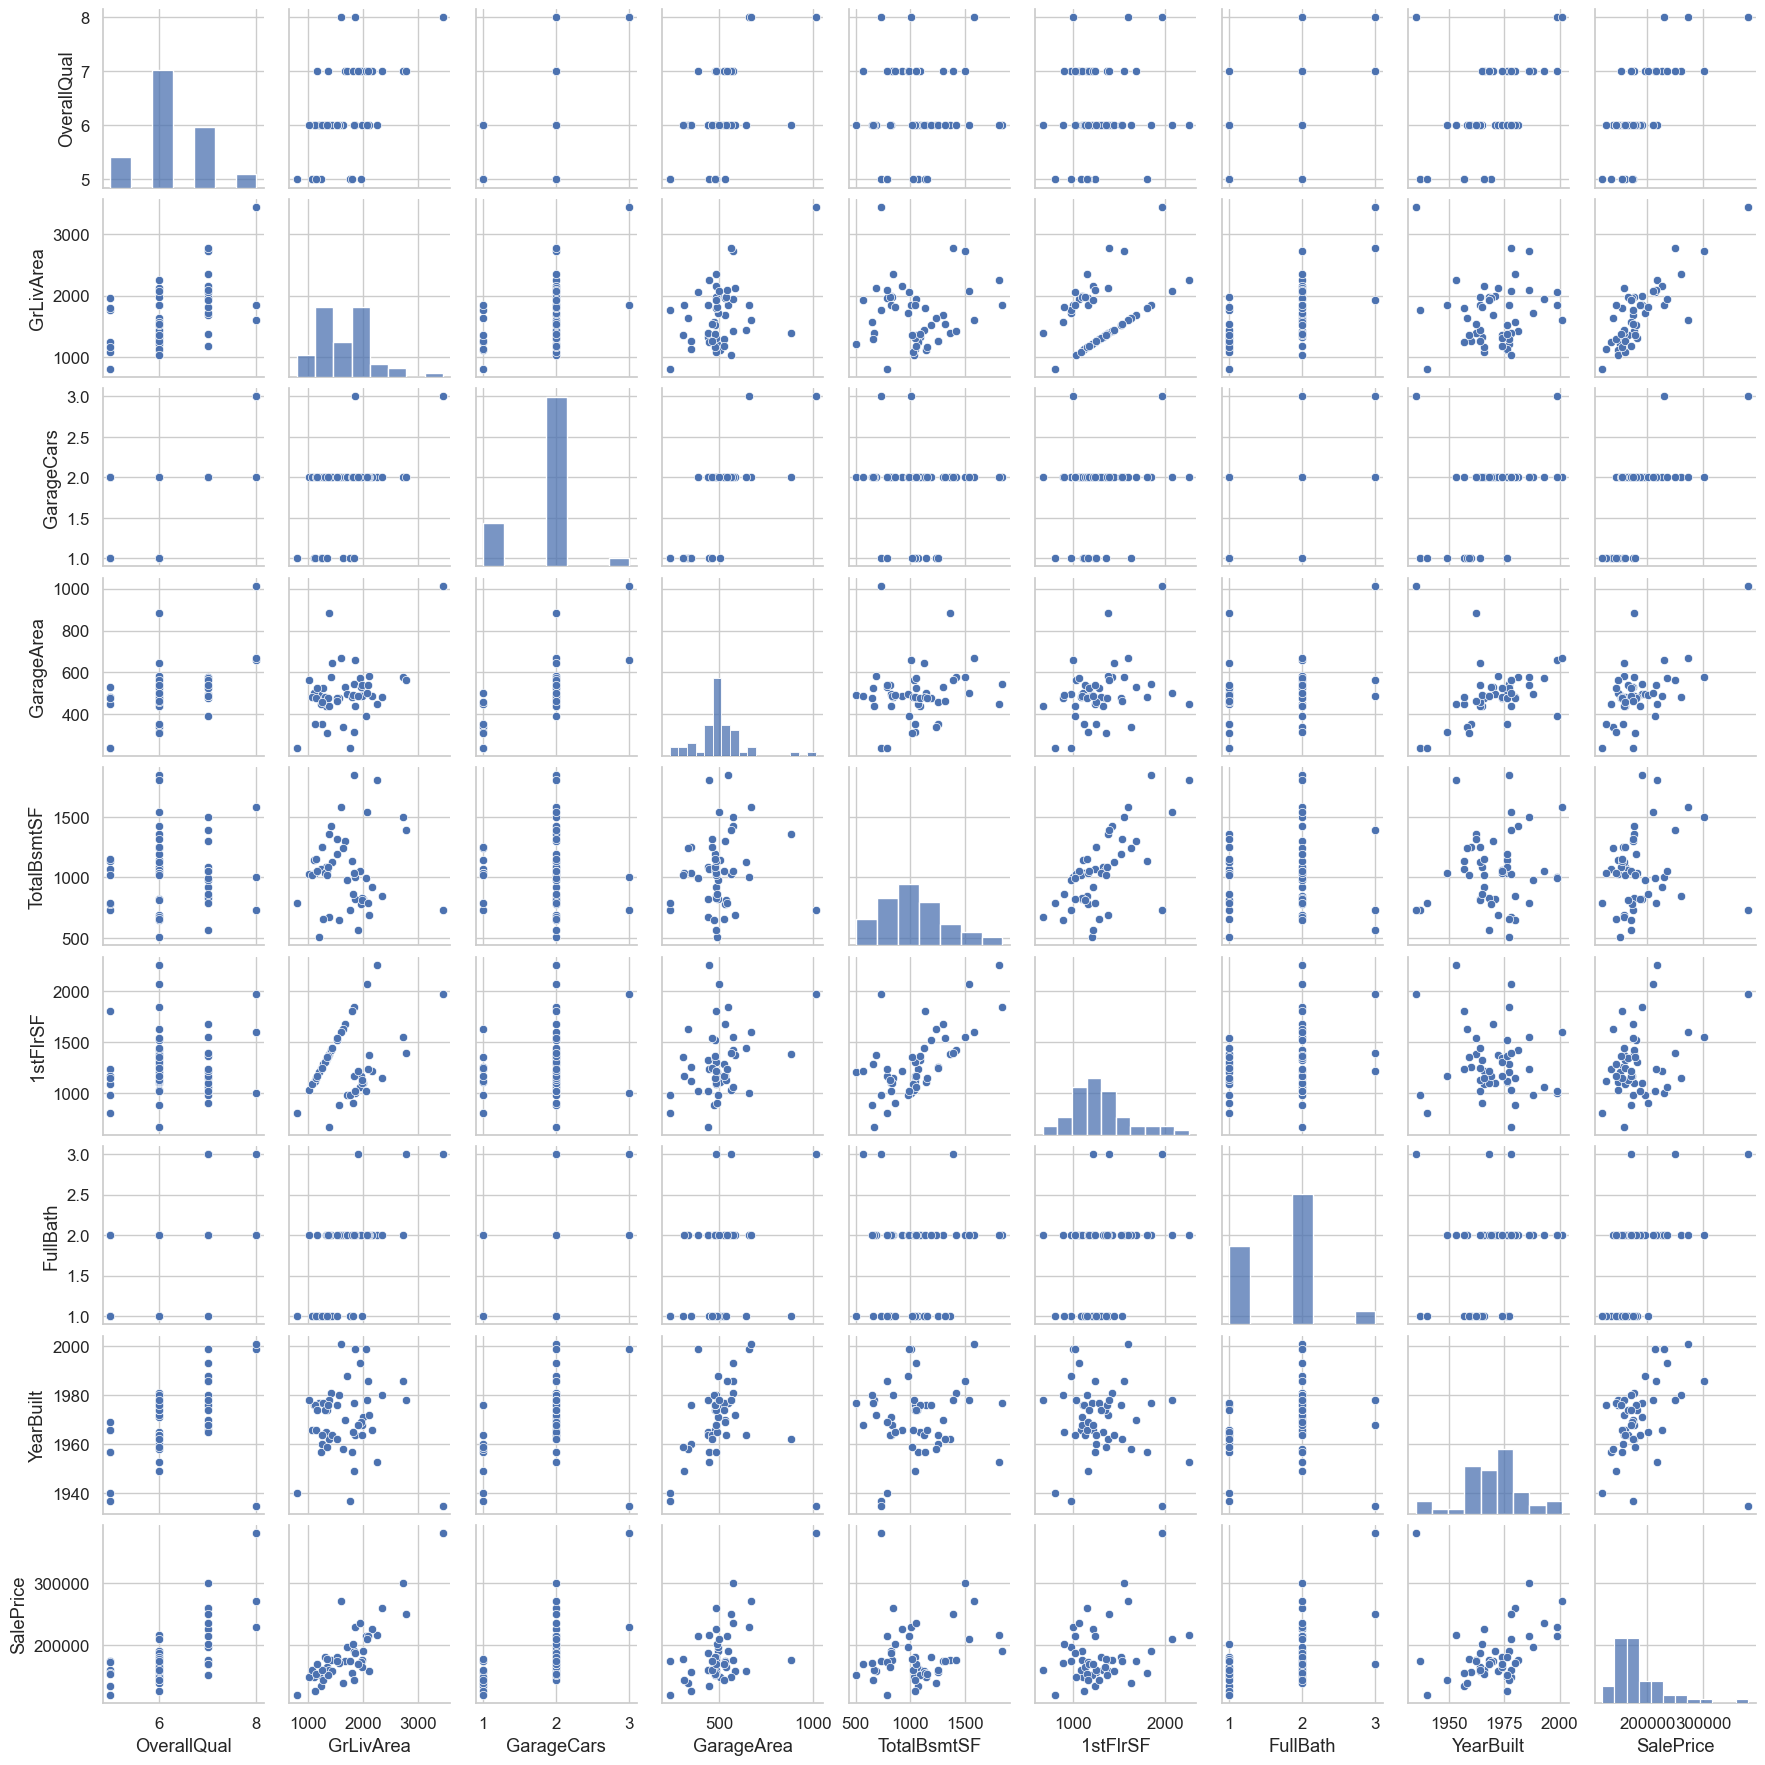

In [726]:
## Plotting Pairplot for Numerical Values
varnumerical=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','SalePrice']
sb.pairplot(housing_data[varnumerical],height=2)
plt.show()

- OverallQual - It is obvious that having a good quality house would fetch bigger price
- Grlivarea - More the area of the floor above the ground floor, greater is the price
- Garage cars, garage area, total basement SF, 1st floor SF -Seems to make sense 

## Let us  find the other cariables which is not relevant for the Housing cost Estimation


In [727]:
total = housing_data.isnull().sum().sort_values(ascending=False)
percent = (housing_data.isnull().sum()/housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
MSSubClass        0      0.0
BedroomAbvGr      0      0.0
GarageType        0      0.0
FireplaceQu       0      0.0
Fireplaces        0      0.0
Functional        0      0.0
TotRmsAbvGrd      0      0.0
KitchenQual       0      0.0
KitchenAbvGr      0      0.0
HalfBath          0      0.0
CentralAir        0      0.0
FullBath          0      0.0
BsmtHalfBath      0      0.0
BsmtFullBath      0      0.0
GrLivArea         0      0.0
LowQualFinSF      0      0.0
2ndFlrSF          0      0.0
1stFlrSF          0      0.0
GarageYrBlt       0      0.0
GarageFinish      0      0.0

#### Removing data above 50% of data unavailability
- Fence and MasVnrType have more than 50% of unavailable data

In [728]:
# Dropping columns with more tha 90%  of missing values

housing_data.drop(['Fence','MasVnrType'],axis=1,inplace = True)

In [729]:
housing_data.shape

(51, 75)

In [730]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 14 to 1456
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     51 non-null     int64  
 1   MSZoning       51 non-null     object 
 2   LotFrontage    51 non-null     float64
 3   LotArea        51 non-null     int64  
 4   Street         51 non-null     object 
 5   LotShape       51 non-null     object 
 6   LandContour    51 non-null     object 
 7   Utilities      51 non-null     object 
 8   LotConfig      51 non-null     object 
 9   LandSlope      51 non-null     object 
 10  Neighborhood   51 non-null     object 
 11  Condition1     51 non-null     object 
 12  Condition2     51 non-null     object 
 13  BldgType       51 non-null     object 
 14  HouseStyle     51 non-null     object 
 15  OverallQual    51 non-null     int64  
 16  OverallCond    51 non-null     int64  
 17  YearBuilt      51 non-null     int64  
 18  YearRemodAdd  

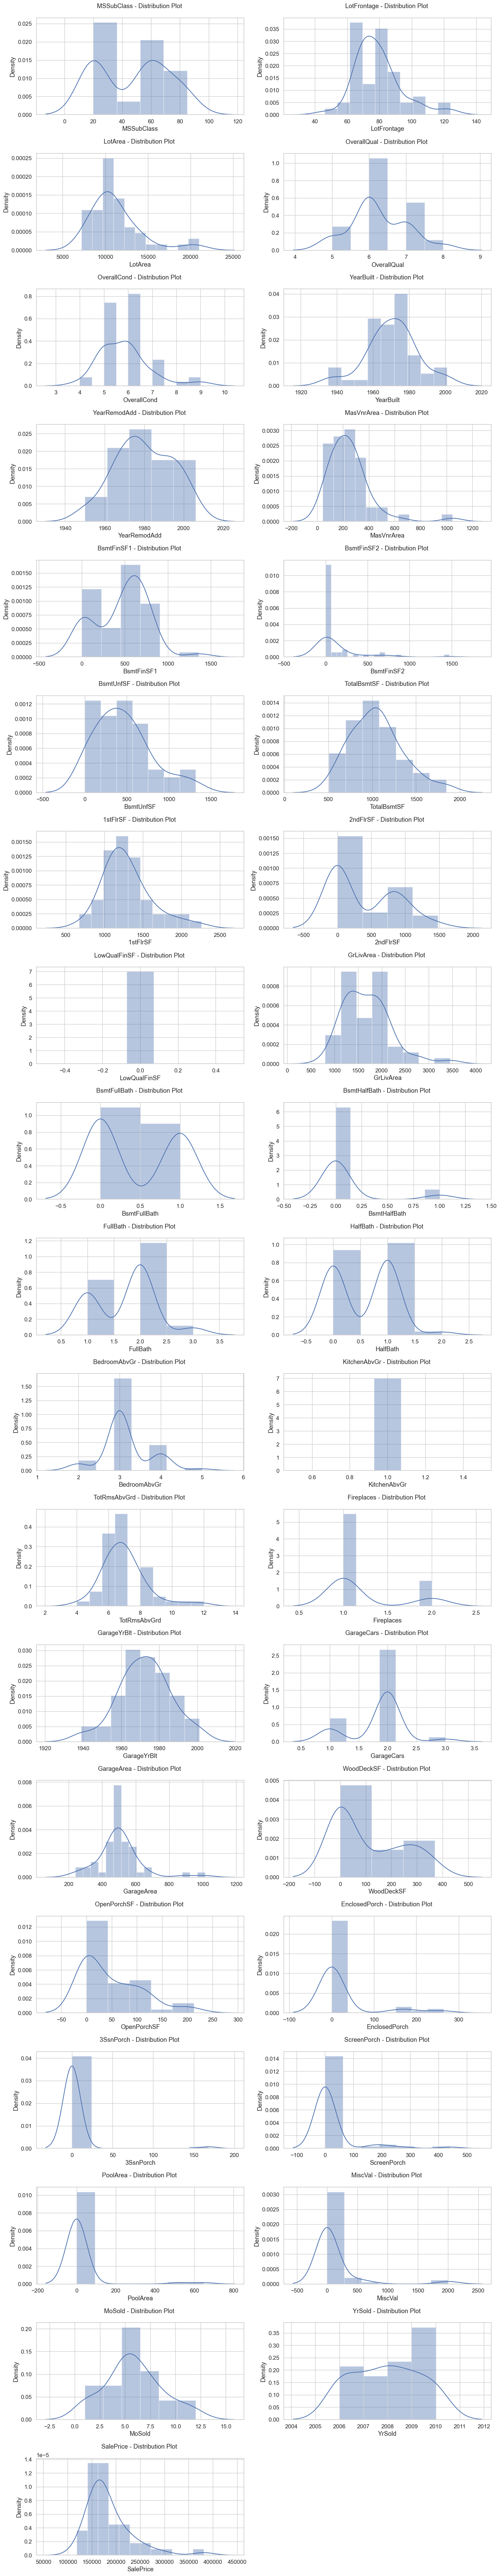

In [731]:
#Lets plot all the numerical columns and observe the outliers
Num_cols = [f for f in housing_data.columns if housing_data.dtypes[f] == 'int64' or housing_data.dtypes[f] == 'float64']
plt.figure(figsize=(15,100))
#The size of the plot
c=0
for i in Num_cols:
    c=c+1
    plt.subplot(25,2,c)
    plt.title(str(i)+" - Distribution Plot \n")
    sb.distplot(housing_data[str(i)])
    
plt.tight_layout()#to avoid overlapping layout
plt.show()#to display the plot

In [732]:
#As we can observe there are outlier in many columns, listing them below
outlier = ['LotFrontage','LotArea','MasVnrArea','GrLivArea']
for i in outlier:
    qnt = housing_data[i].quantile(0.98)#removing data above 98 percentile
    housing_data = housing_data[housing_data[i] < qnt]


## Checking the kind of data in the columns have and remove them if found irrelevant

## Box Plot for Categorical Variables

In [733]:
qualitative = [f for f in housing_data.columns if housing_data.dtypes[f] == 'object']

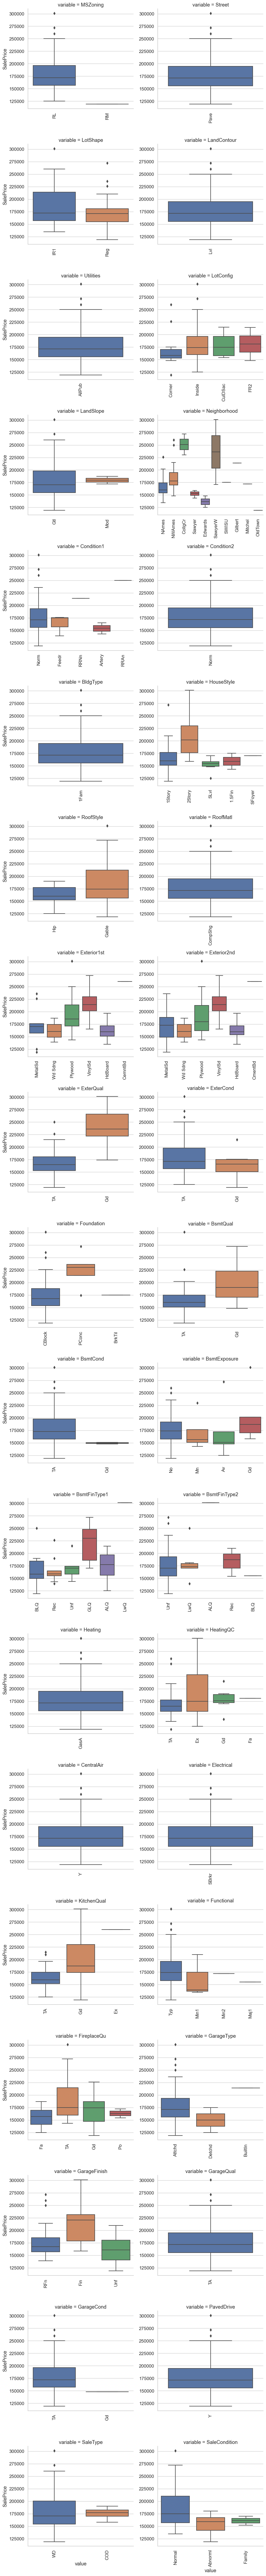

In [734]:
for c in qualitative:
    housing_data[c] = housing_data[c].astype('category')
    if housing_data[c].isnull().any():
        housing_data[c] = housing_data[c].cat.add_categories(['MISSING'])
        housing_data[c] = housing_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sb.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing_data, id_vars=['SalePrice'], value_vars=qualitative)
g = sb.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

## As there are several categorical variables present so we need to plot a graph showcasing the highest value feature for sales by finding the uniqueness in the data provided

## From above bar grapgh Feature having high value in Sale Predictions are :
 - Neighbourhood
 - ExterQual
 - BsmtQual
 - KitchenQual


In [735]:
housing_data.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count   46.000000    46.000000     46.000000    46.000000    46.000000   
mean    45.543478    77.434783  10730.108696     6.260870     5.782609   
std     23.528429    11.714478   2505.330160     0.743409     0.940757   
min     20.000000    46.000000   7200.000000     5.000000     4.000000   
25%     20.000000    69.000000   9174.500000     6.000000     5.000000   
50%     60.000000    78.000000  10397.500000     6.000000     6.000000   
75%     60.000000    83.000000  11567.750000     7.000000     6.000000   
max     85.000000   105.000000  20544.000000     8.000000     9.000000   

         YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count    46.000000     46.000000   46.000000    46.000000    46.000000  ...   
mean   1972.130435   1980.260870  222.543478   472.195652   102.630435  ...   
std      13.359322     13.498041  106.612008   309.081407   262.906266  ...   
min    1937.000000   1950.000000   42.000000     0.000000     0.000000  ...   
25%    1964.250000   1971.250000  144.250000   237.000000     0.000000  ...   
50%    1974.000000   1978.000000  222.000000   552.500000     0.000000  ...   
75%    1978.000000   1991.750000  292.500000   666.750000     0.000000  ...   
max    2001.000000   2005.000000  480.000000  1358.000000  1474.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count   46.000000    46.000000      46.000000   46.000000    46.000000   
mean   113.869565    51.456522      16.304348    3.652174    24.043478   
std    134.811409    59.485089      55.074846   24.770249    84.178899   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    39.000000       0.000000    0.000000     0.000000   
75%    236.250000    94.500000       0.000000    0.000000     0.000000   
max    370.000000   213.000000     264.000000  168.000000   440.000000   

         PoolArea      MiscVal     MoSold       YrSold      SalePrice  
count   46.000000    46.000000  46.000000    46.000000      46.000000  
mean    25.369565   132.608696   5.782609  2007.978261  180253.260870  
std    121.074698   430.531634   2.912906     1.437423   38952.977924  
min      0.000000     0.000000   1.000000  2006.000000  119000.000000  
25%      0.000000     0.000000   4.000000  2007.000000  155500.000000  
50%      0.000000     0.000000   6.000000  2008.000000  171500.000000  
75%      0.000000     0.000000   7.750000  2009.000000  194875.000000  
max    648.000000  2000.000000  12.000000  2010.000000  301000.000000  

[8 rows x 37 columns]

## Data Preprocessing - Tranforming the Target variable(SalePrice)

### Target variable
SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

In [736]:
housing_data['SalePrice'].describe()

count        46.000000
mean     180253.260870
std       38952.977924
min      119000.000000
25%      155500.000000
50%      171500.000000
75%      194875.000000
max      301000.000000
Name: SalePrice, dtype: float64

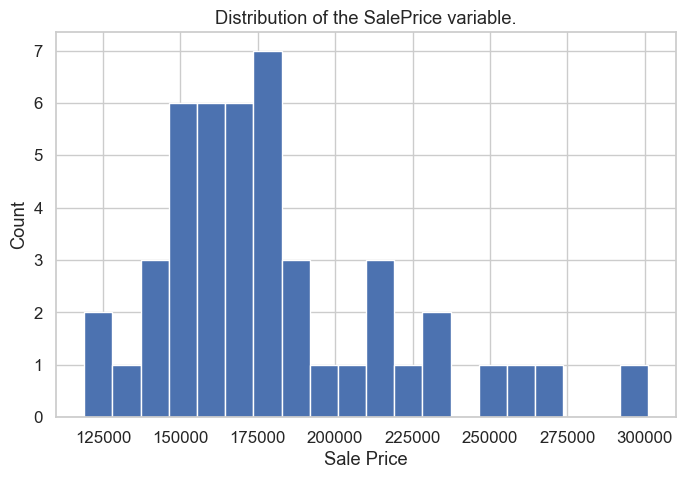

In [737]:
#Check the distribution the SalePrice
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sb.distplot(housing_data['SalePrice'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
plt.show()


 mu = 180253.26 and sigma = 38527.25



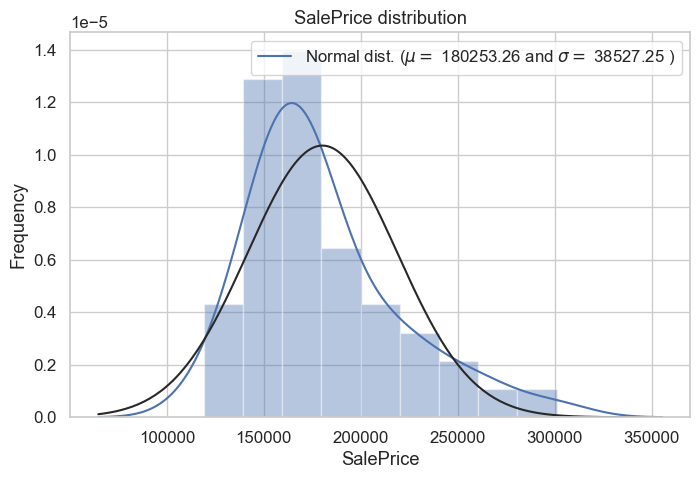

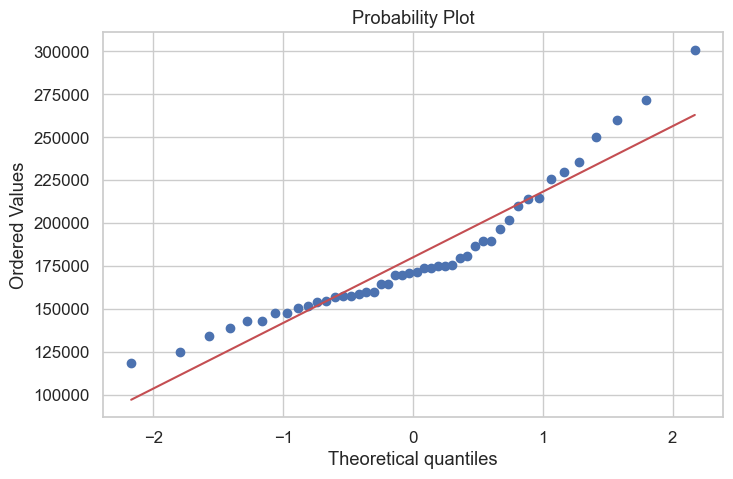

In [738]:
sb.distplot(housing_data['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(housing_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(housing_data['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.We need to transform this variable and make it normally distributed so using log tranformation method

In [739]:
### Log-transformation of the target variable


 mu = 12.08 and sigma = 0.20



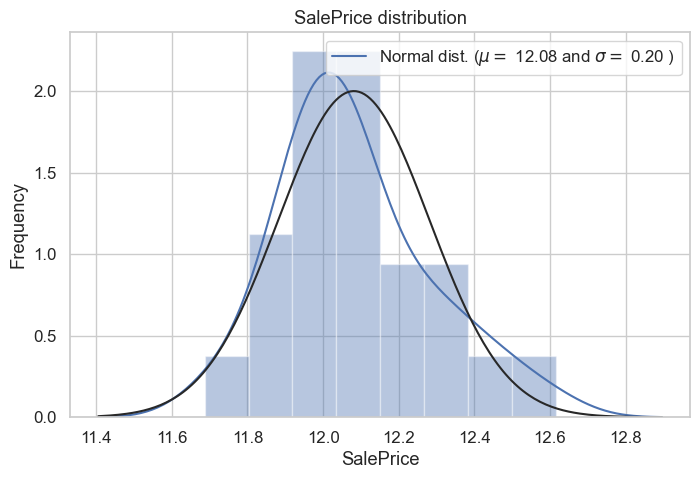

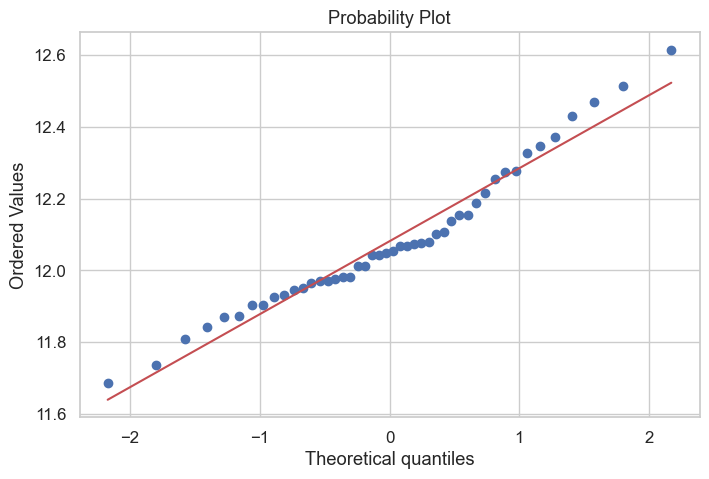

In [740]:
#We use the numpy function log to all elements of the column
housing_data["SalePrice"] = np.log(housing_data["SalePrice"])

#Checking the new distribution 
sb.distplot(housing_data['SalePrice'] , fit=norm);

# Estimating the mu and sigma using the fit function
(mu, sigma) = norm.fit(housing_data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Plotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(housing_data['SalePrice'], plot=plt)
plt.show()


## Data Preprocessing - Manual Encoding few categorical variables

In [814]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})
def map_function7(x):
    return x.map({'RL':2,'RM':1,'NaN':0})
def map_function8(x):
    return x.map({'Pave':1,'NaN':0})

housing_data['ExterQual'] = housing_data[['ExterQual']].apply(map_function)
housing_data['ExterCond'] = housing_data[['ExterCond']].apply(map_function)
housing_data['BsmtQual'] = housing_data[['BsmtQual']].apply(map_function)
housing_data['BsmtCond'] = housing_data[['BsmtCond']].apply(map_function)
housing_data['BsmtExposure'] = housing_data[['BsmtExposure']].apply(map_function1)
housing_data['BsmtFinType1'] = housing_data[['BsmtFinType1']].apply(map_function2)
housing_data['BsmtFinType2'] = housing_data[['BsmtFinType2']].apply(map_function2)
housing_data['HeatingQC'] = housing_data[['HeatingQC']].apply(map_function)
housing_data['CentralAir'] = housing_data[['CentralAir']].apply(map_function3)
housing_data['KitchenQual'] = housing_data[['KitchenQual']].apply(map_function)
housing_data['Functional'] = housing_data[['Functional']].apply(map_function4)
housing_data['GarageFinish'] = housing_data[['GarageFinish']].apply(map_function5)
housing_data['GarageQual'] = housing_data[['GarageQual']].apply(map_function)
housing_data['GarageCond'] = housing_data[['GarageCond']].apply(map_function)
housing_data['PavedDrive'] = housing_data[['PavedDrive']].apply(map_function6)
housing_data['MSZoning'] = housing_data[['MSZoning']].apply(map_function7)
housing_data['Street'] = housing_data[['Street']].apply(map_function8)

converting the columns MSSubClass as categorical as it is a categorical col and not numerical

In [815]:
housing_data['MSSubClass']=housing_data['MSSubClass'].astype('object')

In [816]:
cat_feats  = housing_data.dtypes[housing_data.dtypes == "object"].index
cat_feats  

Index(['MSSubClass'], dtype='object')

In [817]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
GarageFinish                            46                   100.0
ExterQual                               46                   100.0
PavedDrive                              46                   100.0
GarageCond                              46                   100.0
GarageQual                              46                   100.0
...                                    ...                     ...
LotConfig_FR2                            0                     0.0
LotConfig_Inside                         0                     0.0
LandSlope_Mod                            0                     0.0
Neighborhood_Edwards                     0                     0.0
SaleCondition_Normal                     0                     0.0

[213 rows x 2 columns]

In [818]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
GarageFinish                            46                   100.0
ExterQual                               46                   100.0
PavedDrive                              46                   100.0
GarageCond                              46                   100.0
GarageQual                              46                   100.0
...                                    ...                     ...
LotConfig_FR2                            0                     0.0
LotConfig_Inside                         0                     0.0
LandSlope_Mod                            0                     0.0
Neighborhood_Edwards                     0                     0.0
SaleCondition_Normal                     0                     0.0

[213 rows x 2 columns]

## Data Preprocessing - Dummy creation for remaining categorical variables

In [819]:
# Creating dummies
dummies = pd.get_dummies(housing_data[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
housing_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street LotShape LandContour  \
14          20       NaN         69.0    10920     NaN      IR1         Lvl   
40          20       NaN         84.0     8658     NaN      Reg         Lvl   
109         20       NaN        105.0    11751     NaN      IR1         Lvl   
130         60       NaN         88.0    14200     NaN      Reg         Lvl   
135         20       NaN         80.0    10400     NaN      Reg         Lvl   

    Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
14     AllPub    Corner       Gtl  ...               False   
40     AllPub    Inside       Gtl  ...               False   
109    AllPub    Inside       Gtl  ...                True   
130    AllPub    Corner       Gtl  ...               False   
135    AllPub    Inside       Gtl  ...                True   

    Exterior2nd_VinylSd Exterior2nd_Wd Sdng Foundation_CBlock  \
14                False               False              True   
40                False                True              True   
109               False               False              True   
130               False               False              True   
135               False               False             False   

    Foundation_PConc  GarageType_BuiltIn  GarageType_Detchd  SaleType_WD  \
14             False               False              False         True   
40             False               False              False         True   
109            False               False              False        False   
130            False               False              False         True   
135             True               False              False         True   

     SaleCondition_Family SaleCondition_Normal  
14                  False                 True  
40                  False                False  
109                 False                 True  
130                 False                 True  
135                 False                 True  

[5 rows x 213 columns]

In [820]:
# Adding the results back to the cleaned dataframe
housing_data = pd.concat([housing_data, dummy], axis=1)
housing_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street LotShape LandContour  \
14          20       NaN         69.0    10920     NaN      IR1         Lvl   
40          20       NaN         84.0     8658     NaN      Reg         Lvl   
109         20       NaN        105.0    11751     NaN      IR1         Lvl   
130         60       NaN         88.0    14200     NaN      Reg         Lvl   
135         20       NaN         80.0    10400     NaN      Reg         Lvl   

    Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
14     AllPub    Corner       Gtl  ...               False   
40     AllPub    Inside       Gtl  ...               False   
109    AllPub    Inside       Gtl  ...                True   
130    AllPub    Corner       Gtl  ...               False   
135    AllPub    Inside       Gtl  ...                True   

    Exterior2nd_VinylSd Exterior2nd_Wd Sdng Foundation_CBlock  \
14                False               False              True   
40                False                True              True   
109               False               False              True   
130               False               False              True   
135               False               False             False   

    Foundation_PConc  GarageType_BuiltIn  GarageType_Detchd  SaleType_WD  \
14             False               False              False         True   
40             False               False              False         True   
109            False               False              False        False   
130            False               False              False         True   
135             True               False              False         True   

     SaleCondition_Family SaleCondition_Normal  
14                  False                 True  
40                  False                False  
109                 False                 True  
130                 False                 True  
135                 False                 True  

[5 rows x 259 columns]

In [821]:
housing_data.shape

(46, 259)

In [822]:
#Final check of missing values 
Total_missing = housing_data.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data.isnull().sum()/housing_data.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

Total_missing_values  Percent_missing_values
CentralAir                              46                   100.0
ExterCond                               46                   100.0
GarageFinish                            46                   100.0
BsmtQual                                46                   100.0
BsmtCond                                46                   100.0
...                                    ...                     ...
HouseStyle_SFoyer                        0                     0.0
HouseStyle_SLvl                          0                     0.0
RoofStyle_Hip                            0                     0.0
Exterior1st_HdBoard                      0                     0.0
SaleCondition_Normal                     0                     0.0

[259 rows x 2 columns]

## Data Modeling -Test Train spliting

In [823]:
# model building - Test Train split
np.random.seed(0)
house_train,house_test = train_test_split(housing_data, train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(32, 259)
(14, 259)


In [824]:
# display the first five rows of train dataframe
house_train.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street LotShape LandContour  \
795          60       NaN         70.0     8400     NaN      Reg         Lvl   
215          20       NaN         72.0    10011     NaN      IR1         Lvl   
1428         30       NaN         60.0     7200     NaN      Reg         Lvl   
715          20       NaN         78.0    10140     NaN      Reg         Lvl   
853          80       NaN         69.0    12095     NaN      IR1         Lvl   

     Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
795     AllPub    Inside       Gtl  ...               False   
215     AllPub    Inside       Gtl  ...               False   
1428    AllPub    Corner       Gtl  ...               False   
715     AllPub    Inside       Gtl  ...               False   
853     AllPub    Corner       Gtl  ...               False   

     Exterior2nd_VinylSd Exterior2nd_Wd Sdng Foundation_CBlock  \
795                False               False              True   
215                False               False              True   
1428               False               False              True   
715                False               False              True   
853                False               False              True   

     Foundation_PConc  GarageType_BuiltIn  GarageType_Detchd  SaleType_WD  \
795             False               False              False         True   
215             False               False              False         True   
1428            False               False              False         True   
715             False               False              False         True   
853             False               False              False         True   

      SaleCondition_Family SaleCondition_Normal  
795                  False                 True  
215                  False                 True  
1428                 False                False  
715                  False                 True  
853                  False                 True  

[5 rows x 259 columns]

In [825]:
# display the first five rows of test dataframe
house_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street LotShape LandContour  \
152          60       NaN         69.0    14803     NaN      IR1         Lvl   
611          80       NaN         69.0    10395     NaN      IR1         Lvl   
766          60       NaN         80.0    10421     NaN      Reg         Lvl   
1222         50       NaN         78.0    10496     NaN      Reg         Lvl   
1409         60       NaN         46.0    20544     NaN      IR1         Lvl   

     Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
152     AllPub   CulDSac       Gtl  ...               False   
611     AllPub       FR2       Gtl  ...               False   
766     AllPub    Inside       Gtl  ...               False   
1222    AllPub    Inside       Gtl  ...               False   
1409    AllPub   CulDSac       Gtl  ...                True   

     Exterior2nd_VinylSd Exterior2nd_Wd Sdng Foundation_CBlock  \
152                False               False              True   
611                False               False              True   
766                False               False              True   
1222               False                True              True   
1409               False               False              True   

     Foundation_PConc  GarageType_BuiltIn  GarageType_Detchd  SaleType_WD  \
152             False               False              False         True   
611             False               False              False         True   
766             False               False              False         True   
1222            False               False              False         True   
1409            False               False              False         True   

      SaleCondition_Family SaleCondition_Normal  
152                  False                 True  
611                  False                 True  
766                  False                 True  
1222                 False                 True  
1409                 False                 True  

[5 rows x 259 columns]

In [826]:
y_train=house_train.pop('SalePrice')
X_train=house_train

In [827]:
y_test=house_test.pop('SalePrice')
X_test=house_test

## Data Modeling - Scaling

### Scaling the numerical variables

In [828]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 795 to 262
Columns: 258 entries, MSSubClass to SaleCondition_Normal
dtypes: bool(184), category(21), float64(20), int64(32), object(1)
memory usage: 23.2+ KB


In [829]:
#1. Instantiate an scaler object
scaler=MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "category"].index
X_train[numeric_feats]=scaler.fit_transform(X_train[numeric_feats])

In [830]:
X_test[numeric_feats]=scaler.transform(X_test[numeric_feats])

In [831]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street LotShape  \
795     0.615385       NaN     0.222222  0.171429     NaN      Reg   
215     0.000000       NaN     0.266667  0.401571     NaN      IR1   
1428    0.153846       NaN     0.000000  0.000000     NaN      Reg   
715     0.000000       NaN     0.400000  0.420000     NaN      Reg   
853     0.923077       NaN     0.200000  0.699286     NaN      IR1   

     LandContour Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
795          Lvl    AllPub    Inside       Gtl  ...                 0.0   
215          Lvl    AllPub    Inside       Gtl  ...                 0.0   
1428         Lvl    AllPub    Corner       Gtl  ...                 0.0   
715          Lvl    AllPub    Inside       Gtl  ...                 0.0   
853          Lvl    AllPub    Corner       Gtl  ...                 0.0   

     Exterior2nd_VinylSd Exterior2nd_Wd Sdng Foundation_CBlock  \
795                  0.0                 0.0               1.0   
215                  0.0                 0.0               1.0   
1428                 0.0                 0.0               1.0   
715                  0.0                 0.0               1.0   
853                  0.0                 0.0               1.0   

     Foundation_PConc  GarageType_BuiltIn  GarageType_Detchd  SaleType_WD  \
795               0.0                 0.0                0.0          1.0   
215               0.0                 0.0                0.0          1.0   
1428              0.0                 0.0                0.0          1.0   
715               0.0                 0.0                0.0          1.0   
853               0.0                 0.0                0.0          1.0   

      SaleCondition_Family SaleCondition_Normal  
795                    0.0                  1.0  
215                    0.0                  1.0  
1428                   0.0                  0.0  
715                    0.0                  1.0  
853                    0.0                  1.0  

[5 rows x 258 columns]

In [832]:
X_train.describe()

MSSubClass  MSZoning  LotFrontage    LotArea  Street  OverallQual  \
count   32.000000       0.0    32.000000  32.000000     0.0    32.000000   
mean     0.367788       NaN     0.407639   0.421228     NaN     0.406250   
std      0.384235       NaN     0.255165   0.259499     NaN     0.235465   
min      0.000000       NaN     0.000000   0.000000     NaN     0.000000   
25%      0.000000       NaN     0.200000   0.201607     NaN     0.333333   
50%      0.307692       NaN     0.400000   0.423714     NaN     0.333333   
75%      0.615385       NaN     0.538889   0.596643     NaN     0.666667   
max      1.000000       NaN     1.000000   1.000000     NaN     1.000000   

       OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  \
count    32.000000  32.000000     32.000000   32.000000  ...   
mean      0.393750   0.521484      0.540341    0.423171  ...   
std       0.199899   0.188035      0.231012    0.262279  ...   
min       0.000000   0.000000      0.000000    0.000000  ...   
25%       0.200000   0.433594      0.390909    0.232143  ...   
50%       0.400000   0.562500      0.490909    0.403226  ...   
75%       0.400000   0.625000      0.709091    0.580069  ...   
max       1.000000   1.000000      1.000000    1.000000  ...   

       Exterior2nd_Plywood  Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  \
count            32.000000            32.000000            32.000000   
mean              0.218750             0.062500             0.156250   
std               0.420013             0.245935             0.368902   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max               1.000000             1.000000             1.000000   

       Foundation_CBlock  Foundation_PConc  GarageType_BuiltIn  \
count          32.000000         32.000000                32.0   
mean            0.906250          0.062500                 0.0   
std             0.296145          0.245935                 0.0   
min             0.000000          0.000000                 0.0   
25%             1.000000          0.000000                 0.0   
50%             1.000000          0.000000                 0.0   
75%             1.000000          0.000000                 0.0   
max             1.000000          1.000000                 0.0   

       GarageType_Detchd  SaleType_WD  SaleCondition_Family  \
count          32.000000    32.000000             32.000000   
mean            0.062500     0.875000              0.062500   
std             0.245935     0.336011              0.245935   
min             0.000000     0.000000              0.000000   
25%             0.000000     1.000000              0.000000   
50%             0.000000     1.000000              0.000000   
75%             0.000000     1.000000              0.000000   
max             1.000000     1.000000              1.000000   

       SaleCondition_Normal  
count             32.000000  
mean               0.718750  
std                0.456803  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                1.000000  
max                1.000000  

[8 rows x 237 columns]

In [833]:
# verify the X_train to check if SalePrice column is removed
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street LotShape  \
795     0.615385       NaN     0.222222  0.171429     NaN      Reg   
215     0.000000       NaN     0.266667  0.401571     NaN      IR1   
1428    0.153846       NaN     0.000000  0.000000     NaN      Reg   
715     0.000000       NaN     0.400000  0.420000     NaN      Reg   
853     0.923077       NaN     0.200000  0.699286     NaN      IR1   

     LandContour Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
795          Lvl    AllPub    Inside       Gtl  ...                 0.0   
215          Lvl    AllPub    Inside       Gtl  ...                 0.0   
1428         Lvl    AllPub    Corner       Gtl  ...                 0.0   
715          Lvl    AllPub    Inside       Gtl  ...                 0.0   
853          Lvl    AllPub    Corner       Gtl  ...                 0.0   

     Exterior2nd_VinylSd Exterior2nd_Wd Sdng Foundation_CBlock  \
795                  0.0                 0.0               1.0   
215                  0.0                 0.0               1.0   
1428                 0.0                 0.0               1.0   
715                  0.0                 0.0               1.0   
853                  0.0                 0.0               1.0   

     Foundation_PConc  GarageType_BuiltIn  GarageType_Detchd  SaleType_WD  \
795               0.0                 0.0                0.0          1.0   
215               0.0                 0.0                0.0          1.0   
1428              0.0                 0.0                0.0          1.0   
715               0.0                 0.0                0.0          1.0   
853               0.0                 0.0                0.0          1.0   

      SaleCondition_Family SaleCondition_Normal  
795                    0.0                  1.0  
215                    0.0                  1.0  
1428                   0.0                  0.0  
715                    0.0                  1.0  
853                    0.0                  1.0  

[5 rows x 258 columns]

In [834]:
y_train.head()

795     12.049419
215     11.808948
1428    11.686879
715     12.013701
853     11.970350
Name: SalePrice, dtype: float64

## Data Modeling - RFE Technique

RFE Recursive feature elimination

In [835]:
lm = LinearRegression()  # Instantiating
lm.fit(X_train, y_train)

ValueError: Input contains NaN

In [836]:
X_train



MSSubClass  MSZoning  LotFrontage   LotArea  Street LotShape  \
795     0.615385       NaN     0.222222  0.171429     NaN      Reg   
215     0.000000       NaN     0.266667  0.401571     NaN      IR1   
1428    0.153846       NaN     0.000000  0.000000     NaN      Reg   
715     0.000000       NaN     0.400000  0.420000     NaN      Reg   
853     0.923077       NaN     0.200000  0.699286     NaN      IR1   
757     0.615385       NaN     0.200000  0.630857     NaN      IR1   
322     0.615385       NaN     0.577778  0.454286     NaN      IR1   
40      0.000000       NaN     0.533333  0.208286     NaN      Reg   
992     0.615385       NaN     0.444444  0.365714     NaN      Reg   
316     0.615385       NaN     0.755556  0.829286     NaN      IR1   
1083    0.000000       NaN     0.444444  0.228571     NaN      Reg   
796     0.000000       NaN     0.244444  0.142429     NaN      Reg   
265     0.000000       NaN     0.400000  0.698571     NaN      IR1   
539     0.000000       NaN     0.200000  0.603286     NaN      Reg   
858     0.000000       NaN     0.444444  0.457143     NaN      Reg   
927     0.615385       NaN     0.200000  0.385714     NaN      Reg   
273     0.000000       NaN     0.444444  0.342857     NaN      Reg   
135     0.000000       NaN     0.444444  0.457143     NaN      Reg   
1355    0.923077       NaN     0.933333  0.427429     NaN      IR1   
1435    0.000000       NaN     0.444444  0.171429     NaN      Reg   
387     0.923077       NaN     0.266667  0.000000     NaN      Reg   
1154    0.615385       NaN     0.200000  0.928571     NaN      IR1   
109     0.000000       NaN     1.000000  0.650143     NaN      IR1   
1055    0.000000       NaN     0.977778  0.594429     NaN      Reg   
953     0.615385       NaN     0.200000  0.553571     NaN      IR1   
269     0.000000       NaN     0.200000  0.102429     NaN      IR1   
516     0.923077       NaN     0.200000  0.464000     NaN      IR1   
799     0.461538       NaN     0.000000  0.000000     NaN      Reg   
1242    1.000000       NaN     0.555556  0.489286     NaN      Reg   
130     0.615385       NaN     0.622222  1.000000     NaN      Reg   
810     0.000000       NaN     0.400000  0.420000     NaN      Reg   
262     0.923077       NaN     0.622222  0.181571     NaN      IR1   

     LandContour Utilities LotConfig LandSlope  ... Exterior2nd_Plywood  \
795          Lvl    AllPub    Inside       Gtl  ...                 0.0   
215          Lvl    AllPub    Inside       Gtl  ...                 0.0   
1428         Lvl    AllPub    Corner       Gtl  ...                 0.0   
715          Lvl    AllPub    Inside       Gtl  ...                 0.0   
853          Lvl    AllPub    Corner       Gtl  ...                 0.0   
757          Lvl    AllPub   CulDSac       Gtl  ...                 0.0   
322          Lvl    AllPub    Inside       Gtl  ...                 1.0   
40           Lvl    AllPub    Inside       Gtl  ...                 0.0   
992          Lvl    AllPub    Inside       Mod  ...                 0.0   
316          Lvl    AllPub    Corner       Gtl  ...                 0.0   
1083         Lvl    AllPub    Inside       Gtl  ...                 0.0   
796          Lvl    AllPub    Inside       Gtl  ...                 1.0   
265          Lvl    AllPub    Inside       Gtl  ...                 0.0   
539          Lvl    AllPub    Inside       Gtl  ...                 0.0   
858          Lvl    AllPub    Inside       Gtl  ...                 0.0   
927          Lvl    AllPub    Inside       Gtl  ...                 0.0   
273          Lvl    AllPub    Inside       Gtl  ...                 0.0   
135          Lvl    AllPub    Inside       Gtl  ...                 1.0   
1355         Lvl    AllPub    Inside       Gtl  ...                 0.0   
1435         Lvl    AllPub    Inside       Gtl  ...                 0.0   
387          Lvl    AllPub    Inside       Gtl  ...                 0.0   
1154         Lvl    AllPub    Inside       Gt

In [837]:

print(lm.coef_)
print(lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [838]:
# Import RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()   
rfe = RFE(lm, 90)
rfe.fit(X_train, y_train)  
print(rfe.support_)        #True or False   
print(rfe.ranking_)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [ ]:
col = X_train.columns[rfe.support_]
col

In [ ]:
# Features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

In [ ]:
# Creating an X_train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 =X_train[col]

In [ ]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe1) #Adding Constant
X_train_rfe1.head()

In [ ]:
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

In [764]:
housing_data.Street.value_counts()

Street
Pave    46
Name: count, dtype: int64

The Linear regression model built with 90 columns selected by RFE technique had the accuracy(Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinerity.¶
Though the accuracy the good it has many features and highly collinear.¶

In [763]:
#we are deleting the other columns not selected by RFE techinque
X_train = X_train[col]
X_test = X_test[col]

NameError: name 'col' is not defined